# Data Wrangling & EDA

This notebooks contains my exploration of the dataset, initial cleaning (if required), and some visualizations to better understand the dataset.  The product of this notebook will be visualizations to better explain trends in the data.

------

## Contents<a id='Contents'></a>
* [Introduction & Feature Descriptions](#introduction--feature-descriptions)
* [Imports & Reading Data](#imports--reading-data)
---

## Introduction & Feature Descriptions

**Introduction will be added here**

**Features & Units:**  
* *Age:* age of the patient [years]  
* *Sex:* sex of the patient [M: Male, F: Female]  
* *ChestPainType:* chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
* *RestingBP:* resting blood pressure [mm Hg]  
* *Cholesterol:* serum cholesterol [mm/dl]  
* *FastingBS:* fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
* *RestingECG:* resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
* *MaxHR:* maximum heart rate achieved [Numeric value between 60 and 202]  
* *ExerciseAngina:* exercise-induced angina [Y: Yes, N: No]  
* *Oldpeak:* ST depression induced by exercise relative to rest
* *ST_Slope:* the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
* *HeartDisease:* output class [1: heart disease, 0: Normal]  
 ---

## Imports & Reading Data

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns',None)
plt.style.use('ggplot')

import sys
sys.path.append('../../../../DS_Mentorship_Projects/')

from utils import missing_data

In [2]:
# Read csv into a pandas dataframe
data = pd.read_csv('../data/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


There are 11 predictor variables and one target variable (HeartDisease).

In [3]:
data.shape

(918, 12)

There are 918 samples with 12 features.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There does not seem to be missing data in the dataset.  The datatypes for categorical features will be encoded after EDA.

In [5]:
#FastingBP and HeartDisease cols are already encoded. Change to object type for EDA
data['FastingBS'] = data['FastingBS'].astype('object')
data['HeartDisease'] = data['HeartDisease'].astype('object')

---

## EDA

In [6]:
#Create df with categorical data for analysis
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
categorical_data = data[object_cols]

In [7]:
#Create df with continuous data for analysis. Include target feature
continuous_data = data.drop(object_cols, axis=1)
continuous_data['HeartDisease'] = data['HeartDisease']

### Continuous Features

In [8]:
# Generate descriptive statistics of each continuous feature
continuous_data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


It is unusual that cholesterol and resting BP have minimums of zero.  This will be analyzed after plotting.

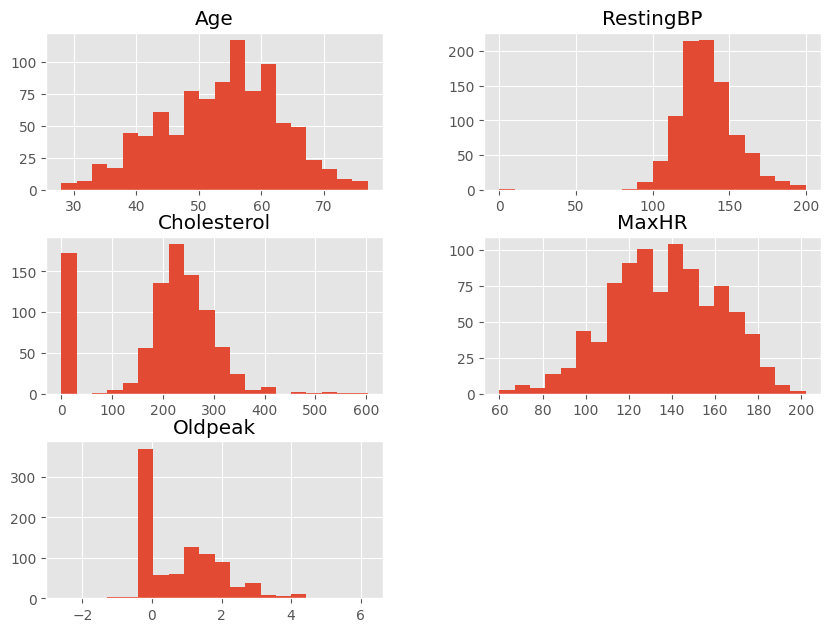

In [9]:
# Plot histograms for continuous features
hist = continuous_data.hist(layout=(4,2), figsize=(10,10), bins=20)

In [10]:
#Count zeros for each feature
zeros_count = missing_data.getZerosCounts(continuous_data)
zeros_count

Age               0
RestingBP         1
Cholesterol     172
MaxHR             0
Oldpeak         368
HeartDisease    410
dtype: int64

In [11]:
#Zeros count as percentage of entire set
zeros_count/len(continuous_data)*100

Age              0.000000
RestingBP        0.108932
Cholesterol     18.736383
MaxHR            0.000000
Oldpeak         40.087146
HeartDisease    44.662309
dtype: float64

There is one resting blood pressure = 0, so this is likely a missing value and can be dropped.  
There is a high percentage (~19%) of zeros for Cholesterol.  This needs to be investigated.  
There is a high percentage (~40%) of zeros for Oldpeak. A value of zero is normal. The non-zero values seem to follow a more normal distribution.  
Almost half of the data is labeled as no heart disease. The data is well balanced.

In [12]:
#Count the negative values for Oldpeak
(continuous_data['Oldpeak'] < 0).sum()

13

There are only a few samples with negative oldpeak. These samples may have had ST elevation rather than depression.

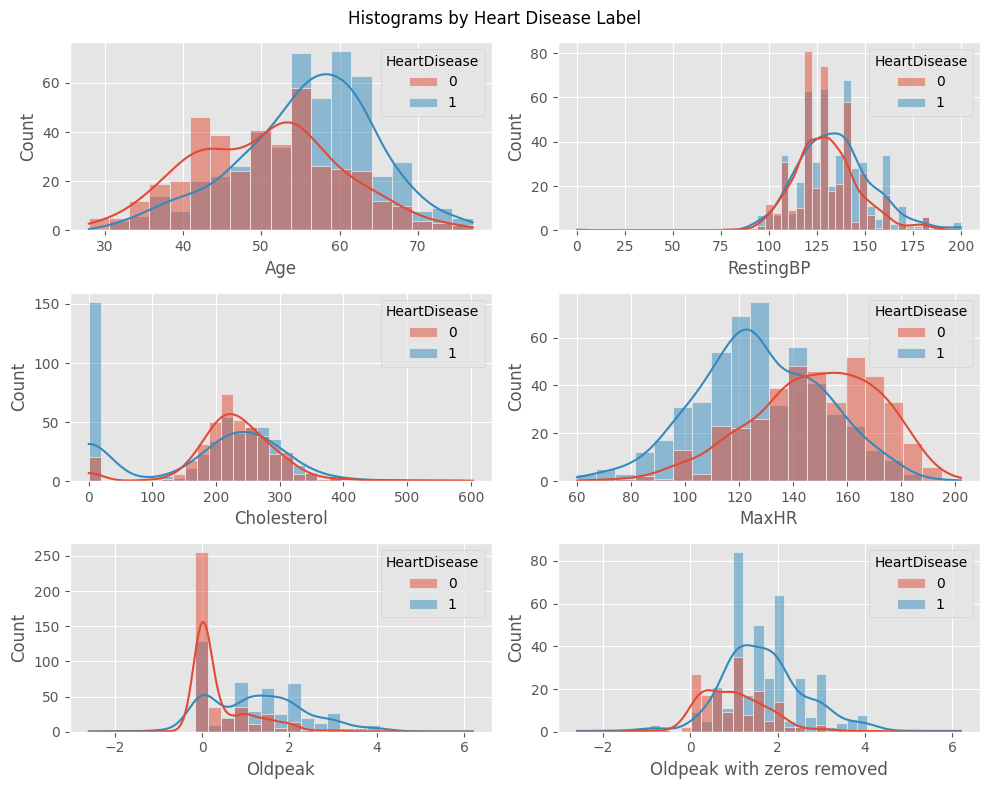

In [13]:
#Observe histograms of continuous features by target label
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

sns.histplot(data=continuous_data, x='Age', kde=True, hue='HeartDisease', ax=axs[0,0])
sns.histplot(data=continuous_data, x='RestingBP', kde=True, hue='HeartDisease', ax=axs[0,1])
sns.histplot(data=continuous_data, x='Cholesterol', kde=True, hue='HeartDisease', ax=axs[1,0])
sns.histplot(data=continuous_data, x='MaxHR', kde=True, hue='HeartDisease', ax=axs[1,1])
sns.histplot(data=continuous_data, x='Oldpeak', kde=True, hue='HeartDisease', ax=axs[2,0])

oldpeak_nonzero = continuous_data[continuous_data['Oldpeak'] != 0]
sns.histplot(data=oldpeak_nonzero, x='Oldpeak', kde=True, hue='HeartDisease', ax=axs[2,1])
axs[2,1].set_xlabel('Oldpeak with zeros removed')

fig.suptitle('Histograms by Heart Disease Label')
fig.tight_layout()

plt.show()

It seems that patients with heart disease tend to be older, have slightly higher resting blood pressure, lower maximum heart rate and a higher value for st depression (oldpeak).

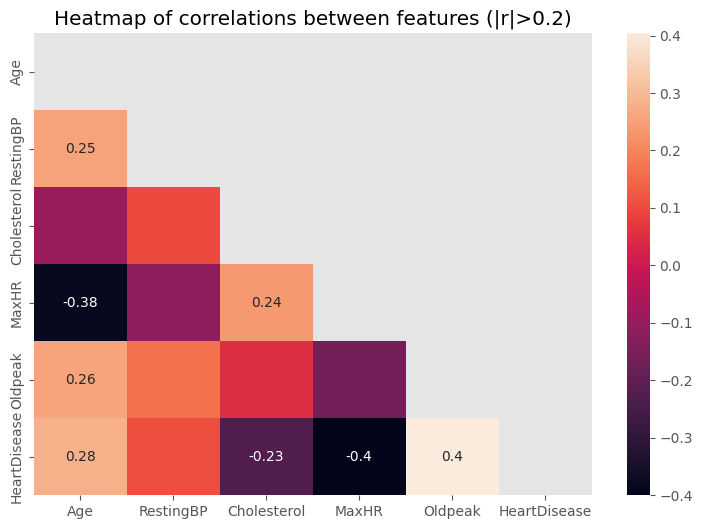

In [14]:
# Heatmap of correlations between each continuousfeature
plt.figure(figsize=(9,6))

heatmap_df = continuous_data.copy()
heatmap_df['HeartDisease'] = heatmap_df['HeartDisease'].astype(int)

mask = np.triu(np.ones_like(heatmap_df.corr()))
heatmap = sns.heatmap(heatmap_df.corr(), annot=True, mask = mask)

for t in heatmap.texts:
    if abs(float(t.get_text()))>=0.2:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

plt.title('Heatmap of correlations between features (|r|>0.2)')

plt.show()

There is no high correlation relationships between any features.  The largest absolute correlation is between the the heart disease prediction and both max heart rate (negative) and oldpeak (positive).

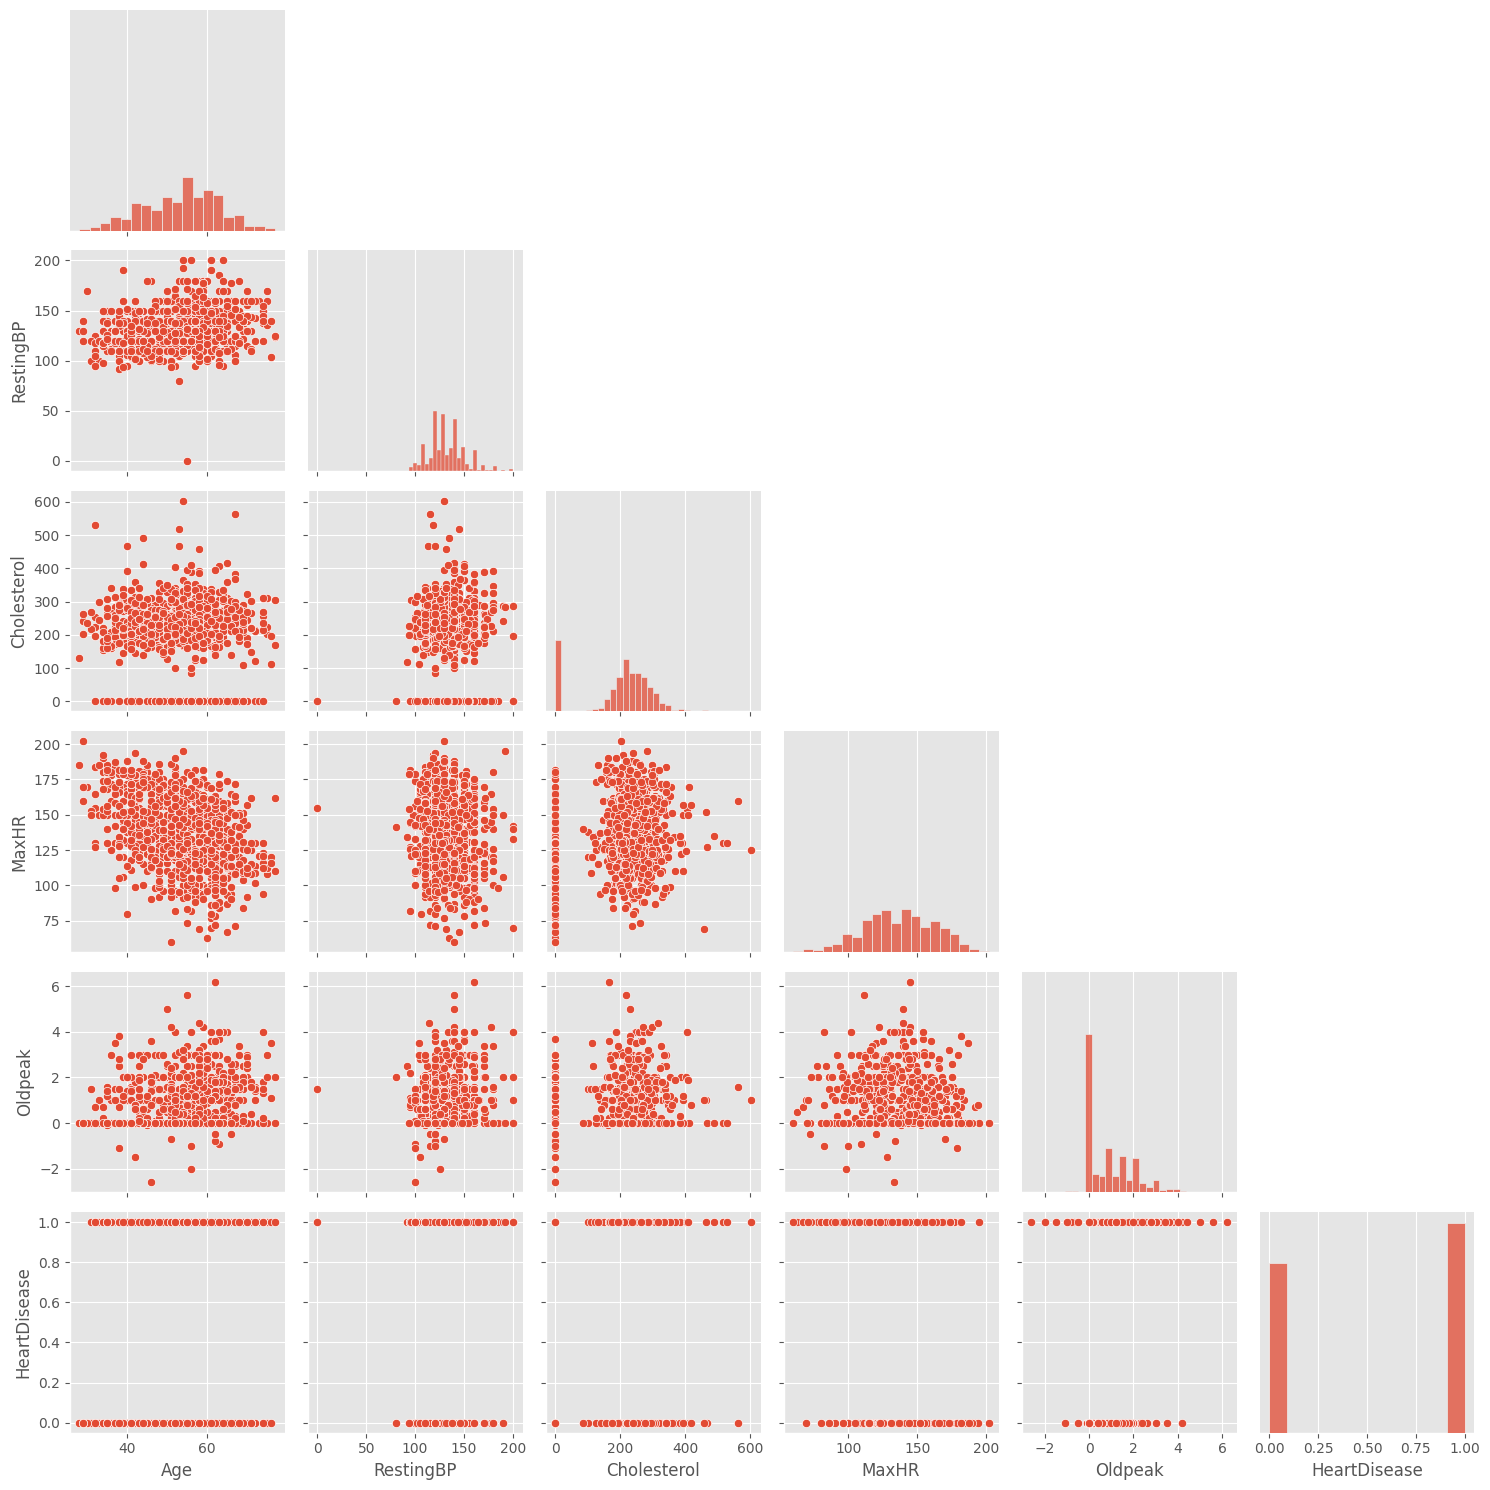

In [15]:
sns.pairplot(data=continuous_data, corner=True)
plt.tight_layout()
plt.show()

The only visible correlation between features is that max heart rate tends to decrease with age.

### Categorical Features

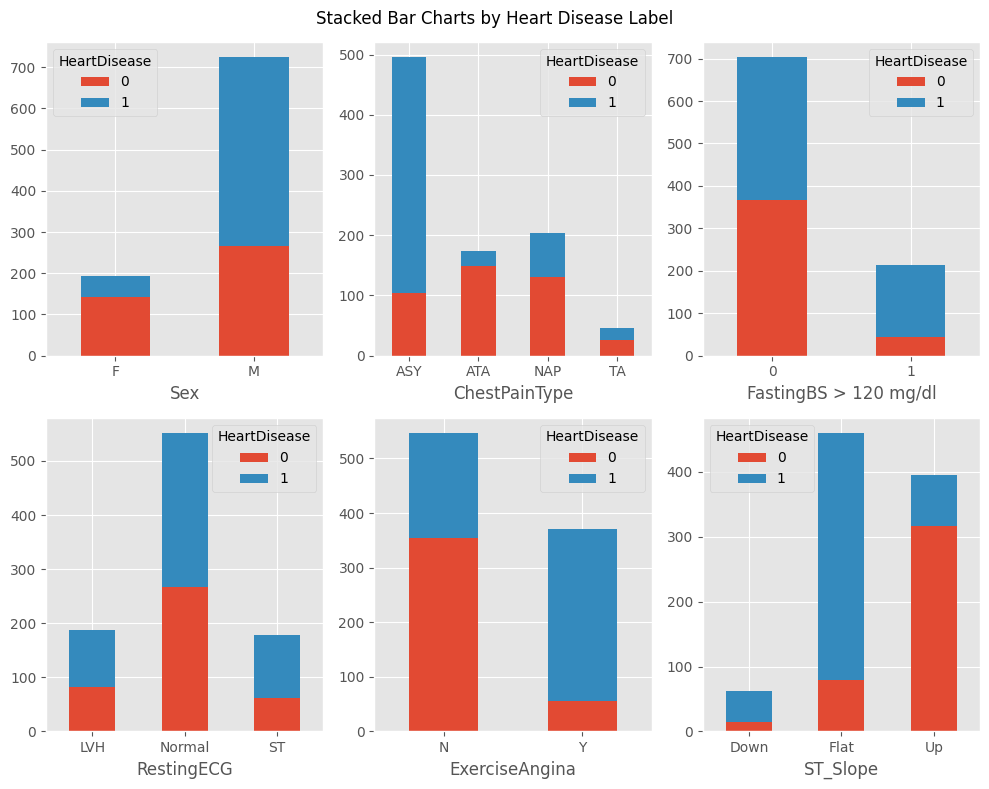

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

for col, ax in zip(categorical_data.columns[:-1], axs.flatten()):
    categorical_data.groupby(col)['HeartDisease'].value_counts().unstack().plot(kind='bar', stacked=True, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

axs[0,2].set_xlabel('FastingBS > 120 mg/dl')

fig.suptitle('Stacked Bar Charts by Heart Disease Label')
plt.tight_layout()
plt.show()

There are a few trends that can be observed from these plots:
* There is much more data for males.
* The proportion of heart disease in males is higher than in females.
* Most patients are asymptomatic with regard to chest pain, have less than 120 mg/dl fasting blood sugar, and have normal resting ECG results.
* Patients that are asymptomatic, have high blood sugar, and have exercise induced angina tend to have higher rates of heart disease.
* Patients that have an up-sloping ST segment tend to have lower rates of heart disease.

### Investigation of Zero-Values

About 19% of the samples had an impossible value of 0 for cholesterol. This will be treated as missing data. The values may be missing at random.  If so, there may be an observable trend with the missing samples evident by samples having missingness correlated to other features.

In [17]:
missing_df = missing_data.generateMissingDataCols(data, ['Cholesterol'])
missing_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_is_zero
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0


In [18]:
missing_df.corr(numeric_only=True)['Cholesterol_is_zero']

Age                    0.138919
RestingBP             -0.070486
Cholesterol           -0.873157
MaxHR                 -0.279669
Oldpeak               -0.027830
Cholesterol_is_zero    1.000000
Name: Cholesterol_is_zero, dtype: float64

The missingness of the cholesterol value doesn't seem to be correlated with any quantitative feature.

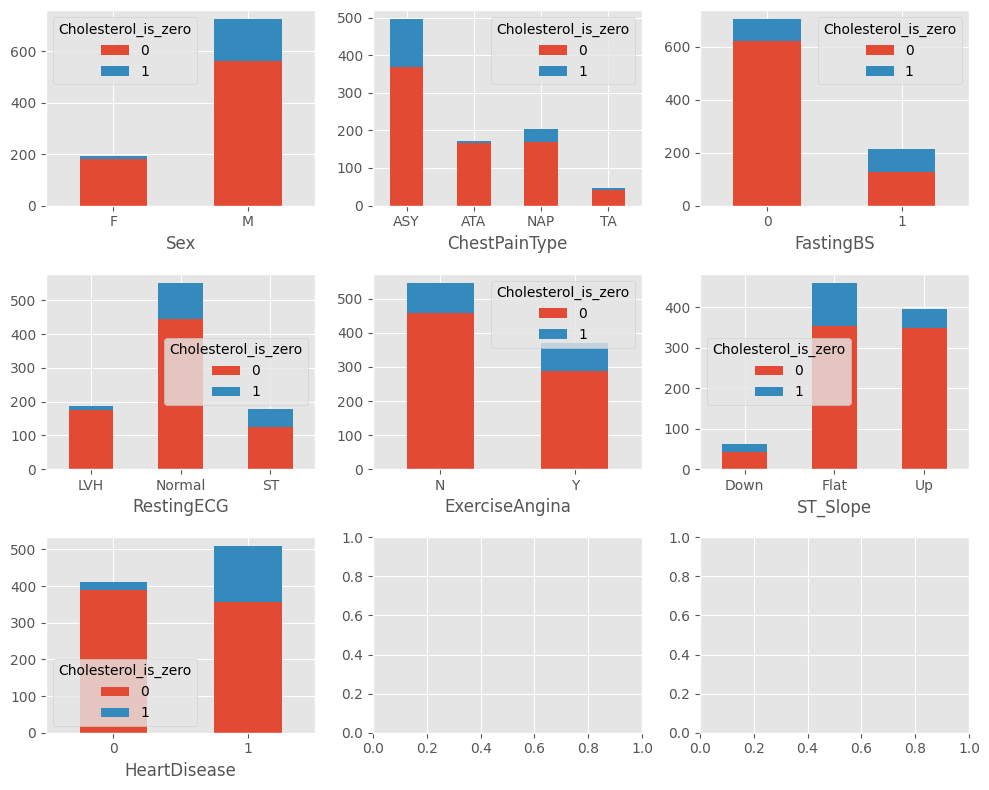

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8))

categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for col, ax in zip(categorical_features, axs.flatten()):
    grouped_col = missing_df.groupby(col)['Cholesterol_is_zero']
    
    graph = grouped_col.value_counts().unstack().plot(kind='bar', stacked=True, ax=ax)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
plt.tight_layout()
plt.show()

In [20]:
df = missing_df.groupby('Sex')['Cholesterol_is_zero'].agg('mean').to_frame()
cat_missing_proportion = pd.concat({'Sex': df}, names=['Feature', 'Category'])

for cat in categorical_features[1:]:
    df = missing_df.groupby(cat)['Cholesterol_is_zero'].agg('mean').to_frame()
    df = pd.concat({cat: df}, names=['Feature', 'Category'])
    cat_missing_proportion = cat_missing_proportion.append(df)
    
cat_missing_proportion.columns = ['Chol_Miss_%']
cat_missing_proportion['Chol_Miss_%'] = cat_missing_proportion['Chol_Miss_%']*100
cat_missing_proportion

Chol_Miss_%
Feature        Category             
Sex            F            5.699482
               M           22.206897
ChestPainType  ASY         25.403226
               ATA          4.046243
               NAP         16.748768
               TA          10.869565
FastingBS      0           11.789773
               1           41.588785
RestingECG     LVH          6.382979
               Normal      19.384058
               ST          29.775281
ExerciseAngina N           16.087751
               Y           22.641509
ST_Slope       Down        31.746032
               Flat        23.043478
               Up          11.645570
HeartDisease   0            4.878049
               1           29.921260

The zeros can be imputed with the mean or median (only after train/test split) in order to avoid losing almost 20% of the data.

## Data Wrangling 
The dataframe will now be modified so that it can be exported and used for modeling.

### Encode categorical features:

In [21]:
data['FastingBS'] = data['FastingBS'].astype(int)

In [22]:
encoded_data = pd.get_dummies(data, columns=['Sex', 'ExerciseAngina', 'ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
encoded_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,1,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,1,0,0,1


### Change Cholesterol zeros to NaN for later imputing:

In [23]:
encoded_data['Cholesterol'].replace(0, np.nan, inplace=True)
encoded_data.sort_values('Cholesterol', na_position='first', inplace=False).head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
293,65,115,NaN,0,93,0.0,1,1,1,0,0,0,1,0,1,0
294,32,95,NaN,1,127,0.7,1,1,0,0,0,1,1,0,0,1
295,61,105,NaN,1,110,1.5,1,1,1,0,0,0,1,0,0,1
296,50,145,NaN,1,139,0.7,1,1,1,0,0,0,1,0,1,0
297,57,110,NaN,1,131,1.4,1,1,1,0,0,0,0,1,0,1


### Handle zeros (except Cholesterol since imputing must be done after train/test split):

In [24]:
#Add column to mark Oldpeak = 0
encoded_data['Oldpeak_is_zero'] = (encoded_data['Oldpeak'] == 0).astype(int)

In [25]:
#Drop single row with missing RestingBP
encoded_data = encoded_data[encoded_data['RestingBP'] != 0]

In [26]:
encoded_data.shape

(917, 17)

The final dataframe has 917 rows with 17 total features.

In [27]:
#Save dataframe to csv file
encoded_data.to_csv('../data/cleaned_heart_data.csv', index=False)